* Formular no mínimo 4 perguntas para responder com suas análises;
1. As onde estão a maior contagem e classificação de reviews?
2. Qual o estado/região/cidade registra mais cancelamentos ou envios não completados?
3. Quais os vendedores mais bem e mau avaliados?
4. Quais os produtos mais mal avaliados?
5. Quais os três tipos de produto mais vendidos?


* Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 1 tabela para enriquecer sua análise.

Base de dados usadas:
1. olist_order_reviews_dataset
2. olist_orders_dataset 
3. olist_products_dataset
4. olist_sellers_dataset

Para responder as perguntas elaboradas usar:

    * Criar pelo menos 3 gráficos.
    * Exporte sua base final em csv.
    * Submeta uma pasta que contenha:
        * o arquivo .ipynb com sua análise exploratória rodada, ou seja, com as respostas aparecendo no notebook;
        * interpretações observadas a partir dos gráficos dentro do notebook;
        * a base final criada por você no formato .csv;
        * especificar quais bases da olist foram usadas;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Tratamento da tabela das reviews
#Dropei colunas desnecessárias e verifiquei nulos.
df_order_review = pd.read_csv('/Users/minavelicastelo/Library/Mobile Documents/com~apple~CloudDocs/Reprograma/on33-python-s14-analise-de-dados/material/olist_data/olist_order_reviews_dataset.csv')
columns_drop = ['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp' ]
df_order_review.drop(['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)
df_order_review.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99224 non-null  object
 1   review_score  99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [28]:
#Tratamento da tabela dos pedidos
#Dropei colunas desnecessárias e verifiquei nulos.
df_order = pd.read_csv('/Users/minavelicastelo/Library/Mobile Documents/com~apple~CloudDocs/Reprograma/on33-python-s14-analise-de-dados/material/olist_data/olist_orders_dataset.csv')
df_order.drop(['customer_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date'], axis=1, inplace=True)
uniques_status_order = ['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved']
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   order_status  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [32]:
#Ler e tratar tabela de produtos
df_product = pd.read_csv('/Users/minavelicastelo/Library/Mobile Documents/com~apple~CloudDocs/Reprograma/on33-python-s14-analise-de-dados/material/olist_data/olist_products_dataset.csv')
df_product.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm'], axis=1, inplace=True)
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [34]:
#DAtaset usado para unir outros datasets
df_id = pd.read_csv('/Users/minavelicastelo/Library/Mobile Documents/com~apple~CloudDocs/Reprograma/on33-python-s14-analise-de-dados/material/olist_data/olist_order_items_dataset.csv')
df_id.drop(['shipping_limit_date', 'price', 'freight_value'], axis=1, inplace=True)
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       112650 non-null  object
 1   order_item_id  112650 non-null  int64 
 2   product_id     112650 non-null  object
 3   seller_id      112650 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [36]:
#Ler e tratar tabela de vendedores
df_sellers = pd.read_csv('/Users/minavelicastelo/Library/Mobile Documents/com~apple~CloudDocs/Reprograma/on33-python-s14-analise-de-dados/material/olist_data/olist_sellers_dataset.csv')
df_sellers.drop(['seller_zip_code_prefix'], axis=1, inplace=True)
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [37]:
#Merge id_review + df_order_review = df_olist_id_review
df_olist_id_review = df_id.merge(df_order_review, how="inner", on="order_id")
df_olist_id_review


,order_id,order_item_id,product_id,seller_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5
...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5


In [38]:
#df_olist_id_review + df_order = df_olist_id_review_order
df_olist_id_review_order = df_olist_id_review.merge(df_order, how="inner", on="order_id")
df_olist_id_review_order

,order_id,order_item_id,product_id,seller_id,review_score,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4,delivered
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5,delivered
...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5,delivered
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5,delivered
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5,delivered
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5,delivered


In [40]:
#df_order = df_olist_id_review_order + df_product = df_olist_id_review_order_product
df_olist_id_review_order_product = df_olist_id_review_order.merge(df_product, how="inner", on="product_id")
df_olist_id_review_order_product

,order_id,order_item_id,product_id,seller_id,review_score,order_status,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4,delivered,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5,delivered,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4,delivered,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5,delivered,ferramentas_jardim
...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5,delivered,utilidades_domesticas
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5,delivered,informatica_acessorios
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5,delivered,esporte_lazer
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5,delivered,informatica_acessorios


In [41]:
#df_olist_id_review_order_product + id_sellers = df_olist_all
df_olist_all = df_olist_id_review_order_product.merge(df_sellers, how="inner", on="seller_id")
df_olist_all

,order_id,order_item_id,product_id,seller_id,review_score,order_status,product_category_name,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4,delivered,pet_shop,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5,delivered,moveis_decoracao,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4,delivered,perfumaria,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5,delivered,ferramentas_jardim,loanda,PR
...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5,delivered,utilidades_domesticas,itajai,SC
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5,delivered,informatica_acessorios,sao paulo,SP
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5,delivered,esporte_lazer,curitiba,PR
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5,delivered,informatica_acessorios,sao paulo,SP


In [45]:
#retirar a coluna order_item_id, já que ela nao serve para responder nenhuma das perguntas feitas
#df_olist_all.drop(['order_item_id'], axis=1, inplace=True)
df_olist_all

,order_id,product_id,seller_id,review_score,order_status,product_category_name,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4,delivered,pet_shop,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5,delivered,moveis_decoracao,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4,delivered,perfumaria,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5,delivered,ferramentas_jardim,loanda,PR
...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5,delivered,utilidades_domesticas,itajai,SC
112368,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5,delivered,informatica_acessorios,sao paulo,SP
112369,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5,delivered,esporte_lazer,curitiba,PR
112370,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5,delivered,informatica_acessorios,sao paulo,SP


In [47]:
df_olist_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               112372 non-null  object
 1   product_id             112372 non-null  object
 2   seller_id              112372 non-null  object
 3   review_score           112372 non-null  int64 
 4   order_status           112372 non-null  object
 5   product_category_name  110774 non-null  object
 6   seller_city            112372 non-null  object
 7   seller_state           112372 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.9+ MB


In [46]:
#Exportar csv com os dados tratados e as tabelas unidas
df_olist_all.to_csv("merged_olist_df.csv")

1. As onde estão a maior contagem e classificação de reviews?
2. Qual o estado/região/cidade registra mais cancelamentos ou envios não completados?
3. Quais os vendedores mais bem e mau avaliados?
4. Quais os produtos mais mal avaliados?
5. Quais os três tipos de produto mais vendidos?

In [48]:
#As onde estão a maior contagem e classificação de reviews?
df_olist_all.review_score.value_counts()

review_score
5    63525
4    21315
1    14235
3     9423
2     3874
Name: count, dtype: int64

A maior contagem de classificação é a 5 estrelas com 63525. Dado que revela que as pessoas tendem a fazer reviews quando o produto as agrada e/ou que a satisfação da loja, no geral, é boa.

In [73]:
#Qual o estado/região/cidade registra mais cancelamentos ou envios não completados?
canceled_count = df_olist_all[df_olist_all['order_status'] == 'canceled'].shape[0]
canceled_count


529

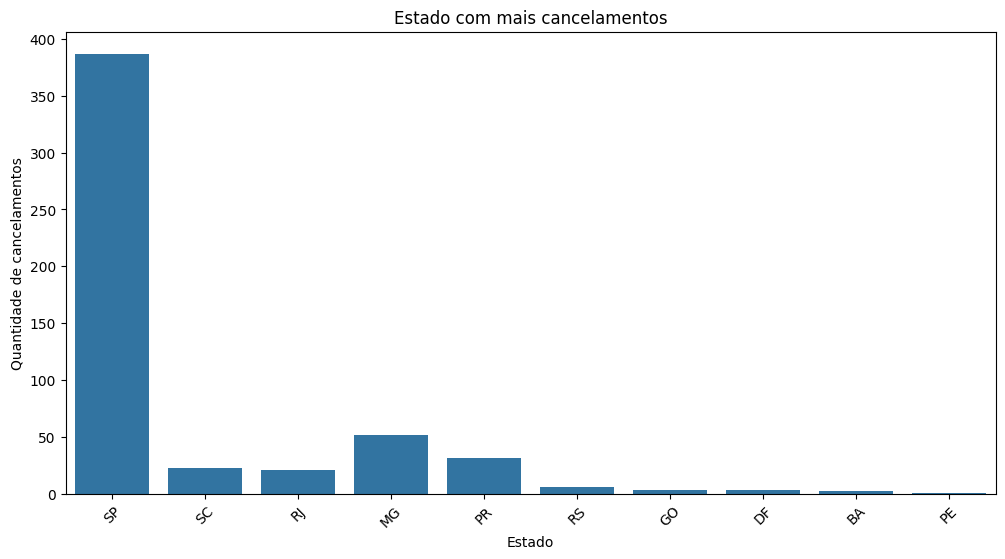

In [87]:
# Filtrar contagem de status: 'canceled'
df_canceled = df_olist_all[df_olist_all['order_status'] == 'canceled']

# Tamanho do gráfico
plt.figure(figsize=(12,6))

# Excecução do gráfico
sns.countplot(data=df_canceled, x='seller_state')

plt.title('Estado com mais cancelamentos')
plt.xlabel('Estado')
plt.ylabel('Quantidade de cancelamentos')

plt.xticks(rotation=45)

plt.show()

O Estado com mais cancelamentos é SP, visto que é o estado com mais registros de vendas. 

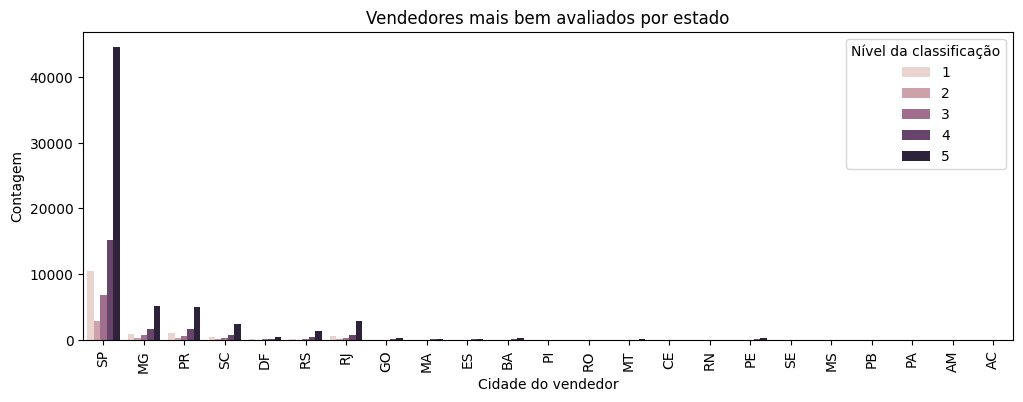

In [98]:
#Quais os vendedores mais bem e mau avaliados?

plt.figure(figsize=(12,4))

sns.countplot(data=df_olist_all, x='seller_state', hue='review_score')

plt.title('Vendedores mais bem avaliados por estado')
plt.xlabel('Cidade do vendedor')
plt.ylabel('Contagem')

plt.xticks(rotation=90)

#plotar e definir texto da legenda
plt.legend(title='Nível da classificação')
plt.show()

SP volta a ser o estado mais bem avaliado. Sendo o ES o mais mal avaliado, mas mais pela quantidade de transações centradas em SP.

In [101]:
df_olist_all.product_category_name.unique()

array(['cool_stuff', 'pet_shop', 'moveis_decoracao', 'perfumaria',
       'ferramentas_jardim', 'utilidades_domesticas', 'telefonia',
       'beleza_saude', 'livros_tecnicos', 'fashion_bolsas_e_acessorios',
       'cama_mesa_banho', 'esporte_lazer', 'consoles_games',
       'moveis_escritorio', 'malas_acessorios', 'alimentos',
       'agro_industria_e_comercio', 'eletronicos',
       'informatica_acessorios', 'construcao_ferramentas_construcao',
       'audio', 'bebes', 'construcao_ferramentas_iluminacao',
       'brinquedos', 'papelaria', 'industria_comercio_e_negocios',
       'relogios_presentes', 'automotivo', nan, 'eletrodomesticos',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'climatizacao',
       'casa_conforto', 'telefonia_fixa', 'portateis_casa_forno_e_cafe',
       'fraldas_higiene', 'sinalizacao_e_seguranca',
       'instrumentos_musicais', 'eletroportateis',
       'construcao_ferramentas_jardim', 'artes', 'casa_construcao',
       'livros_interesse_geral', 'a

In [116]:
def categorizar_produto(objeto):
    if objeto in ['fashion_bolsas_e_acessorios', 'malas_acessorios', 'fashion_underwear_e_moda_praia',
                  'fashion_roupa_masculina', 'fashion_calcados', 'fashion_roupa_feminina',
                  'fashion_esporte', 'fashion_roupa_infanto_juvenil']:
        return "Vestuário"
    
    if objeto in ['perfumaria', 'beleza_saude', 'fraldas_higiene']:
        return "Cosméticos"
    
    if objeto in ['construcao_ferramentas_construcao', 'construcao_ferramentas_iluminacao', 
                  'sinalizacao_e_seguranca', 'casa_construcao', 'construcao_ferramentas_seguranca', 
                  'construcao_ferramentas_ferramentas']:
        return "Construção"
    
    if objeto in ['moveis_decoracao', 'moveis_escritorio', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 
                  'moveis_sala', 'moveis_quarto', 'moveis_colchao_e_estofado', 'cool_stuff']:
        return "Móveis e decoração"
    
    if objeto in ['ferramentas_jardim', 'construcao_ferramentas_jardim', 'flores']:
        return "Jardinagem"
    
    if objeto in ['utilidades_domesticas', 'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2', 
                  'artes_e_artesanato', 'la_cuisine']:
        return "Cama, mesa e Banho"
    
    if objeto in ['telefonia', 'consoles_games', 'eletronicos', 'informatica_acessorios', 'audio', 
                  'eletrodomesticos', 'climatizacao', 'telefonia_fixa', 'portateis_casa_forno_e_cafe', 
                  'eletroportateis', 'cine_foto', 'eletrodomesticos_2', 'pcs', 
                  'portateis_cozinha_e_preparadores_de_alimentos', 'dvds_blu_ray', 'cds_dvds_musicais', 
                  'tablets_impressao_imagem', 'pc_gamer']:
        return "Eletrônicos e eletrodomésticos"
    
    if objeto in ['bebes', 'brinquedos']:
        return "Brinquedos"

    if objeto == 'pet_shop':
        return "Pet Shop"
    
    if objeto in ['livros_tecnicos', 'papelaria', 'livros_interesse_geral', 'livros_importados']:
        return "Livraria e Papelaria"
    
    if objeto in ['alimentos', 'alimentos_bebidas', 'bebidas']:
        return "Alimentos e Bebidas"
    if objeto in ['automotivo']:
        return "Automotivos"
    if objeto in ['nan']:
        return "Outros"




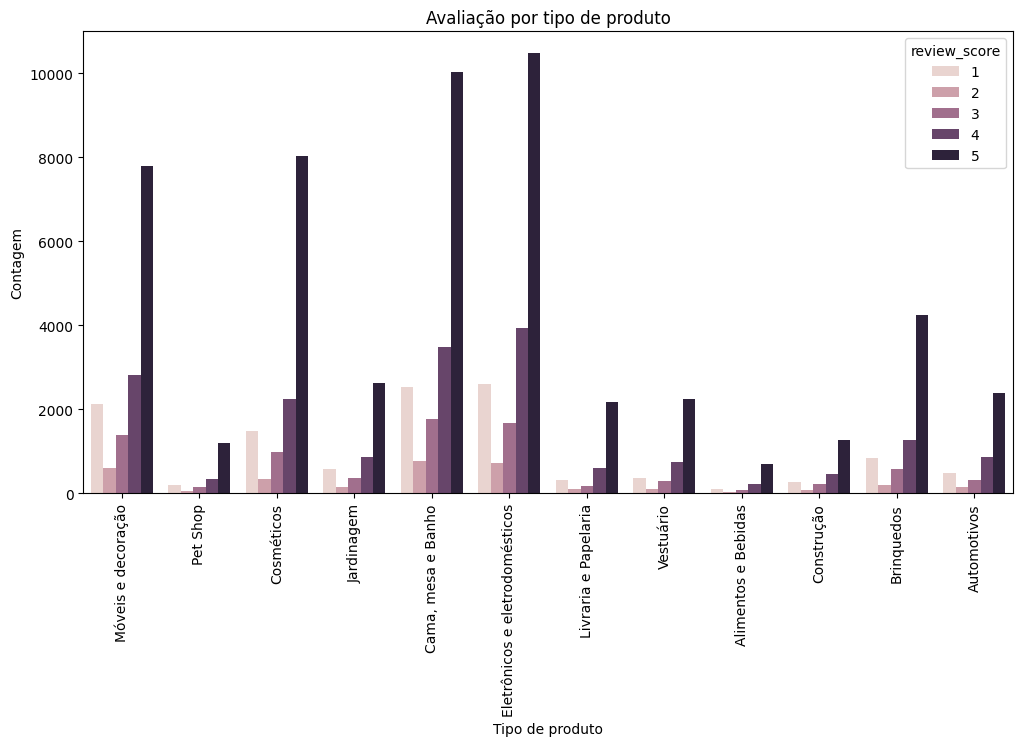

In [119]:
#Quais os produtos mais mal avaliados?
tipo_produto = df_olist_all["product_category_name"].apply(categorizar_produto)

plt.figure(figsize=(12,6))



sns.countplot(data=df_olist_all, x=tipo_produto, hue='review_score')


plt.title('Avaliação por tipo de produto')
plt.xlabel('Tipo de produto')
plt.ylabel('Contagem')


plt.xticks(rotation=90)


plt.show()

O tipo de produto com a pior classificação são 'Cama, mesa e banho' e ' Eletrodomésticos e eletrónicos'

Quais os três tipos de produto mais vendidos?



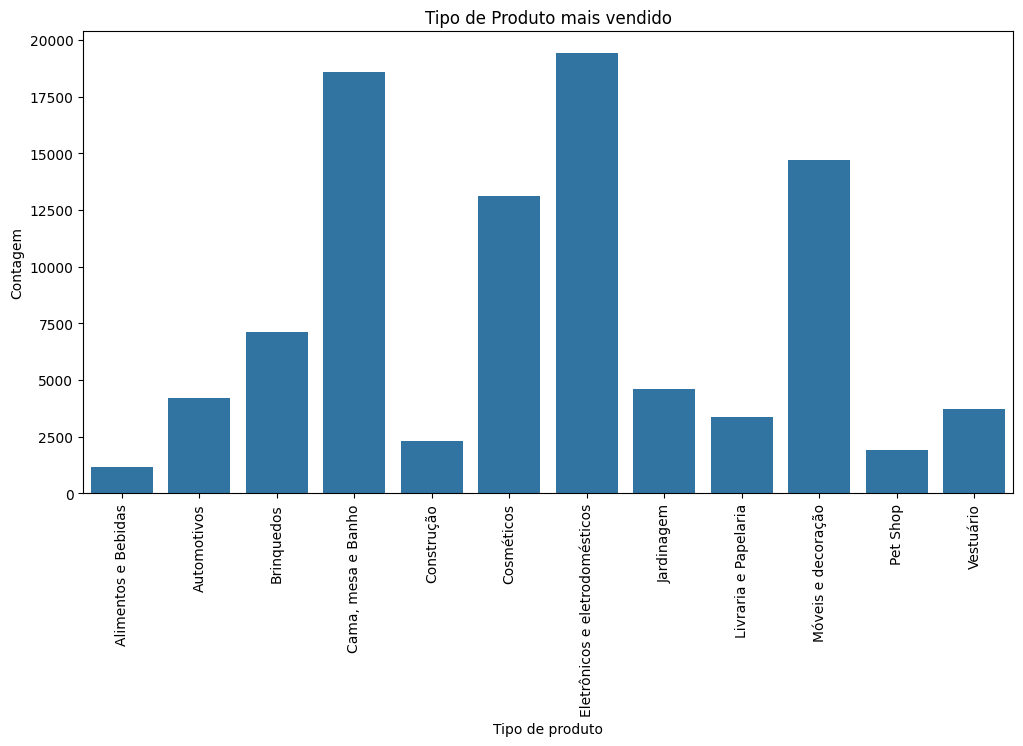

In [127]:
#Quais os produtos mais mal avaliados?
tipo_produto = df_olist_all["product_category_name"].apply(categorizar_produto)

plt.figure(figsize=(12,6))



sns.countplot(data=df_olist_all, x=tipo_produto.sort_values())


plt.title('Tipo de Produto mais vendido')
plt.xlabel('Tipo de produto')
plt.ylabel('Contagem')


plt.xticks(rotation=90)


plt.show()


Os três tipos de produtos mais vendidos foram:
3. Móveis e decoração
2. Cama, mesa e banho
1. Eletrônicos e eletrodomésticos